<a href="https://www.kaggle.com/code/abhi011097/summary-about-supermarket-data?scriptVersionId=119837323" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Content
***    
    
    1. Pre Analysis
        1.1 Importing required Library
        1.2 Configuring Setting
        1.3 File Read
        1.4 Structure Investigation Before Cleaning
        1.5 Null Data Analysis (Before & After)
        1.6 Structure Investigation After Cleaning
    
    
    2. Analysis
        2.1 Facts about Orders Using Order Id
        2.2 Facts About Customer using user_id
        2.3 Productive Time ( Using order_dow & order_hour_of_day )
        2.4 Frequent Purchase ( Using department & product_name)
    
    3. Summary
        
    
***    

## 1. Pre Analysis

### 1.1 | Importing required Library

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import math

### 1.2 | Configuring Setting

In [2]:
%matplotlib inline
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',100)          # Set now of columns visible to 20

###  1.3 | File Read

In [3]:
df_raw=pd.read_csv("/kaggle/input/ecommerce-dataset-for-predictive-marketing-2023/ECommerce_consumer behaviour.csv")

df=df_raw.copy()

### 1.4 | Structure Investigation Before Cleaning

In [4]:
df.shape # 12 columns and 2019501 rows

(2019501, 12)

In [5]:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name'],
      dtype='object')

In [6]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [8]:
pd.value_counts(df.dtypes)

int64      9
object     2
float64    1
dtype: int64

In [9]:
df[df['order_id']==2425083]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables
5,2425083,49125,1,2,18,NaN,91,6,0,16,dairy eggs,soy lactosefree
6,2425083,49125,1,2,18,NaN,120,7,0,16,dairy eggs,yogurt
7,2425083,49125,1,2,18,NaN,59,8,0,15,canned goods,canned meals beans
8,2425083,49125,1,2,18,NaN,35,9,0,12,meat seafood,poultry counter


In [10]:
df.describe()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id
count,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06,1.895159e+06,2.019501e+06,2.019501e+06,2.019501e+06,2.019501e+06
mean,1.707013e+06,1.030673e+05,1.715138e+01,2.735367e+00,1.343948e+01,1.138603e+01,7.120590e+01,8.363173e+00,5.897427e-01,9.928349e+00
std,9.859832e+05,5.949117e+04,1.752576e+01,2.093882e+00,4.241008e+00,8.970980e+00,3.820727e+01,7.150059e+00,4.918804e-01,6.282933e+00
min,1.000000e+01,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00
25%,8.526490e+05,5.158400e+04,5.000000e+00,1.000000e+00,1.000000e+01,5.000000e+00,3.100000e+01,3.000000e+00,0.000000e+00,4.000000e+00
50%,1.705004e+06,1.026900e+05,1.100000e+01,3.000000e+00,1.300000e+01,8.000000e+00,8.300000e+01,6.000000e+00,1.000000e+00,9.000000e+00
75%,2.559031e+06,1.546000e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.500000e+01,1.070000e+02,1.100000e+01,1.000000e+00,1.600000e+01
max,3.421080e+06,2.062090e+05,1.000000e+02,6.000000e+00,2.300000e+01,3.000000e+01,1.340000e+02,1.370000e+02,1.000000e+00,2.100000e+01


In [11]:
df.nunique()

order_id                  200000
user_id                   105273
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
dtype: int64

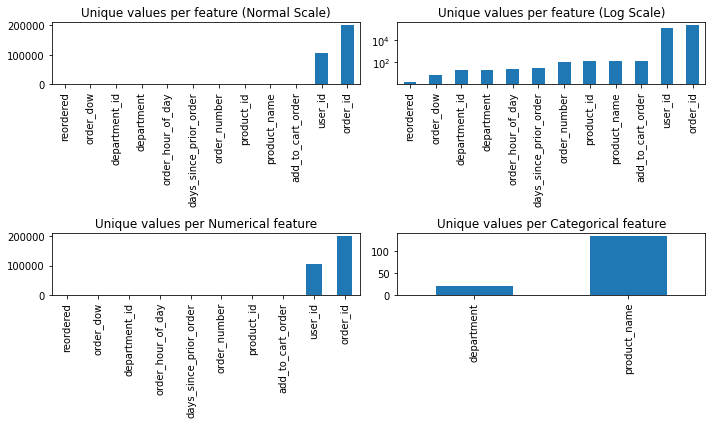

In [12]:
# Combined Plot

plt.subplots(2,2,figsize=(10,6),squeeze=False)
plt.subplot(2,2,1)
df.nunique().sort_values().plot.bar(  title="Unique values per feature (Normal Scale)")
plt.subplot(2,2,2)
df.nunique().sort_values().plot.bar( logy=True, title="Unique values per feature (Log Scale)")

plt.subplot(2,2,3)
df.select_dtypes(include="number").nunique().sort_values().plot.bar(title="Unique values per Numerical feature");
plt.subplot(2,2,4)
df.select_dtypes(exclude="number").nunique().sort_values().plot.bar(title="Unique values per Categorical feature");
plt.tight_layout()
plt.show()

### 1.5 | Null Data Analysis (Before & After)

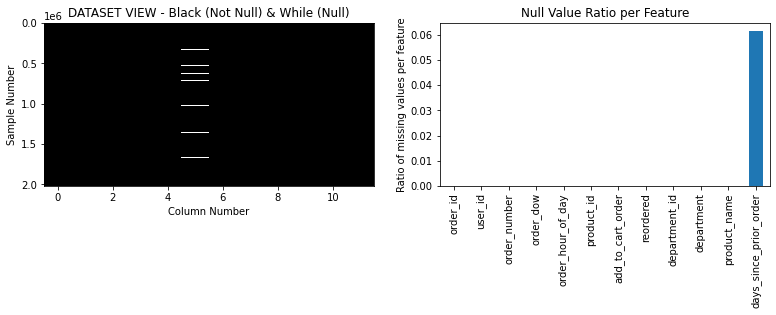

In [13]:
# Before null handling -> Combined Plot

plt.subplots(1,2,figsize=(13,3))
plt.subplot(1,2,1)
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray") # we can test any condition in df using this graph
plt.xlabel("Column Number")
plt.ylabel("Sample Number")
plt.title("DATASET VIEW - Black (Not Null) & While (Null)")
plt.subplot(1,2,2)
df.isna().mean().sort_values().plot( kind="bar", title="Null Value Ratio per Feature", ylabel="Ratio of missing values per feature")
plt.show()

In [14]:
# Null Data Handling
# Almost 60 % of the column is null for days_since_prior_order
df["days_since_prior_order"].fillna(-1,inplace=True)

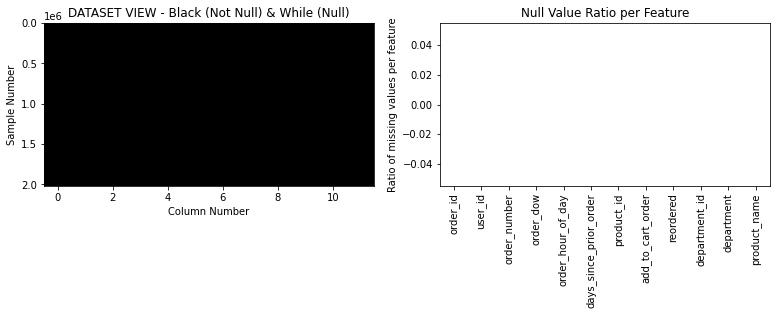

In [15]:
# After null handling -> Combined Plot

plt.subplots(1,2,figsize=(13,3))
plt.subplot(1,2,1)
plt.imshow(df.isna(), aspect="auto", interpolation="nearest", cmap="gray") # we can test any condition in df using this graph
plt.xlabel("Column Number")
plt.ylabel("Sample Number")
plt.title("DATASET VIEW - Black (Not Null) & While (Null)")
plt.subplot(1,2,2)
df.isna().mean().sort_values().plot( kind="bar", title="Null Value Ratio per Feature", ylabel="Ratio of missing values per feature")
plt.show()

### 1.6 | Structure Investigation After Cleaning

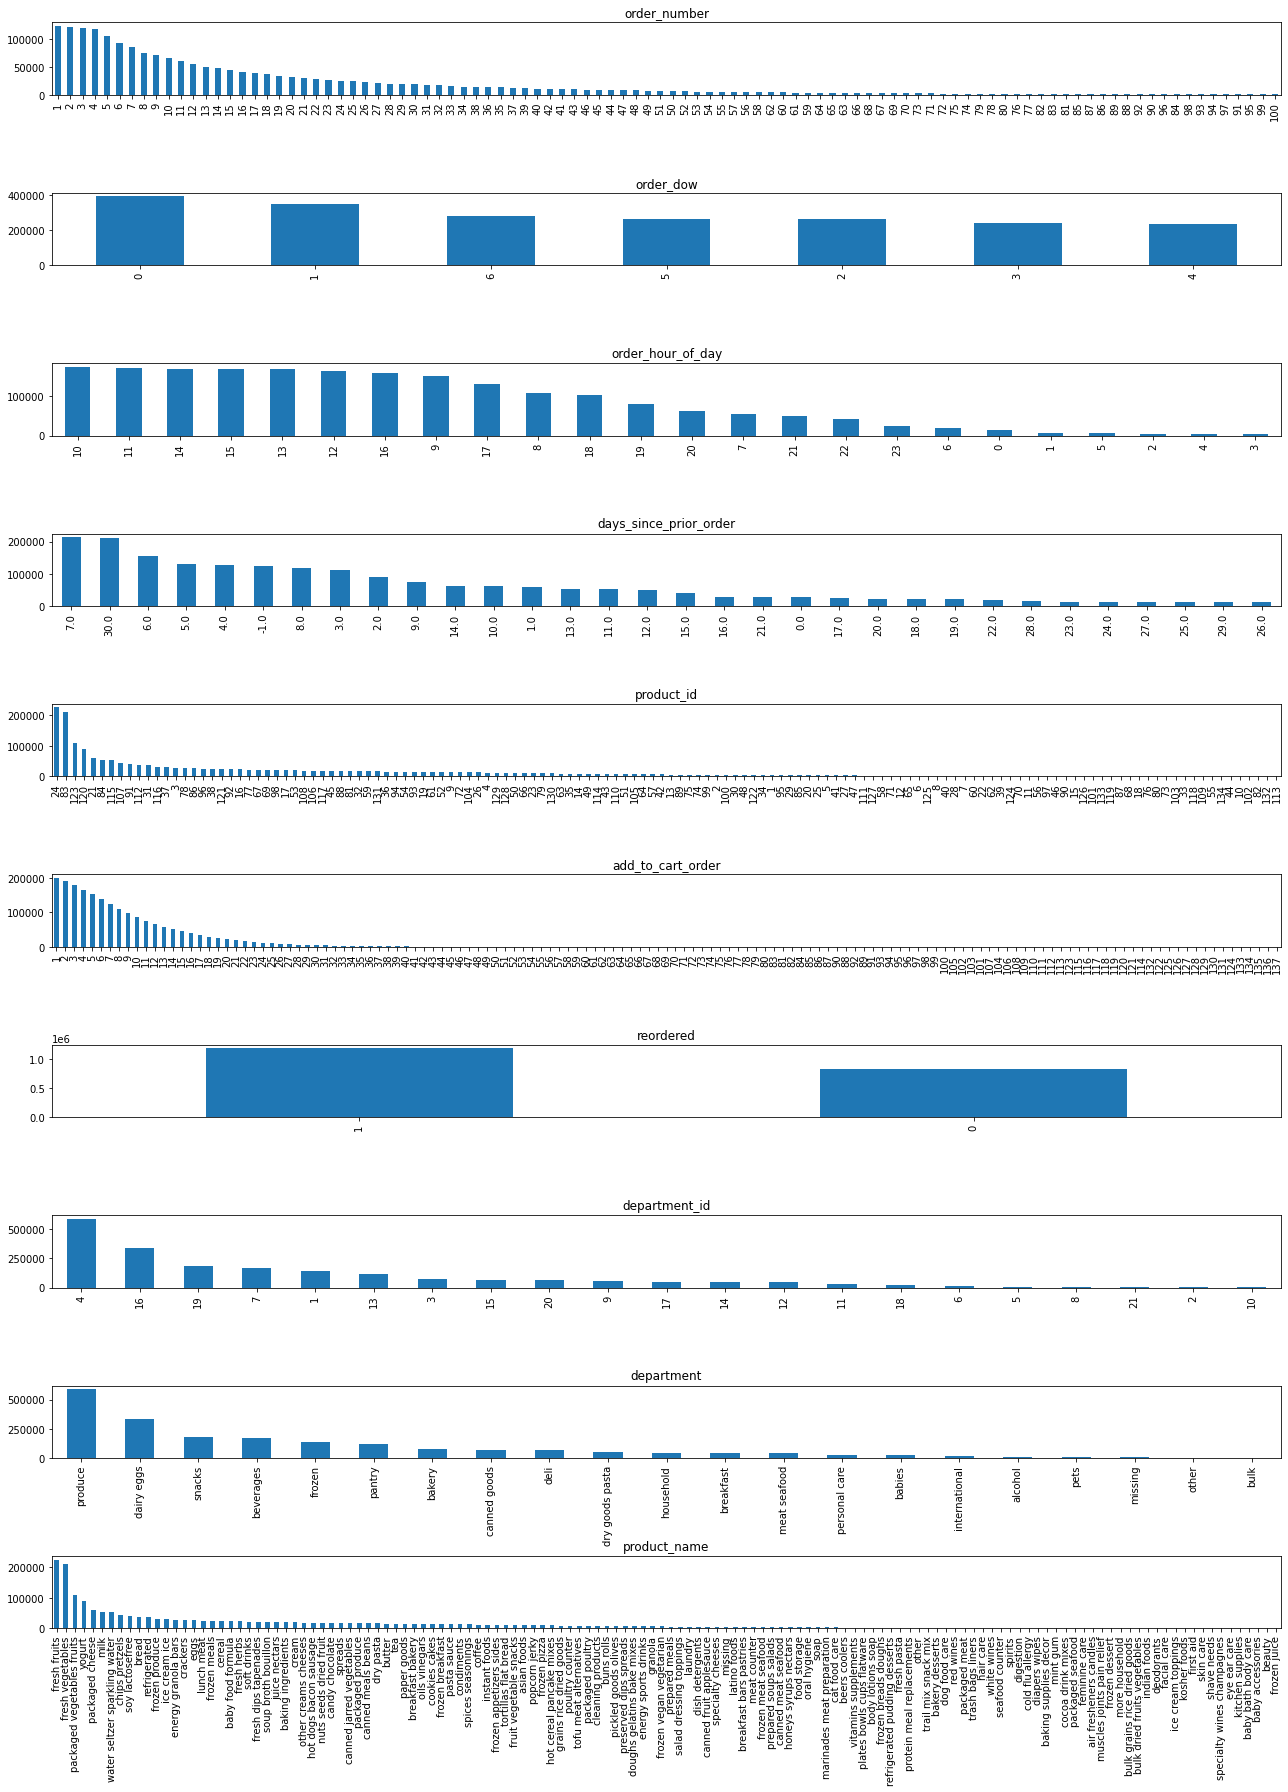

In [16]:
cat_threshold=150
#fields=df.select_dtypes(exclude="number").nunique()[df.select_dtypes(exclude="number").nunique() <=cat_threshold].index.tolist()

fields=df.nunique()[df.nunique() <=cat_threshold].index.tolist()

figuresize=(18,25)
cols=1
rows=math.ceil(len(fields)/cols)
#print()

plt.subplots(rows,cols,figsize=figuresize)
for i in range(1,len(fields)+1) :
    plt.subplot(rows,cols,i)
    df[fields[i-1]].value_counts().sort_values( ascending=False).plot.bar()  
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.title(fields[i-1])
plt.show()

In [17]:
df['days_since_prior_order']=df['days_since_prior_order'].astype(np.int32)

#  product_Id represents product_name represents same info about product -> dropping product_Id
df.drop(columns='product_id',inplace=True)

#  department_id represents department_name represents same info about department -> dropping department_id
df.drop(columns='department_id',inplace=True)

df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'department', 'product_name'],
      dtype='object')

## 2 | Analysis

### 2.1 | Facts about Orders Using Order Id

* We have been provided with 200000 different orders (distinct order_ids)
* On an average each order has around 8 items (Considering median as we have skewness present)
* 50% of the orders have number of items between 5 to 14
* 137 is the highest no of items purchased in a order.


Skewness - >  1.5703035670707923



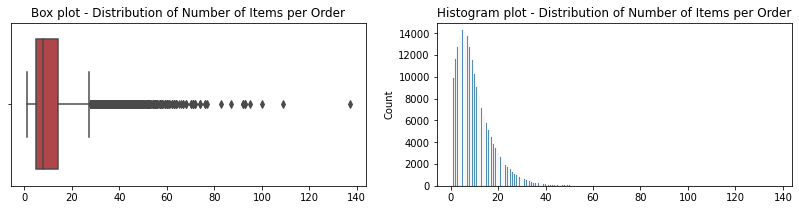

In [18]:
print('\nSkewness - > ',(pd.DataFrame(df.groupby('order_id').size().values)).skew()[0])
print()
# Average no of items added per order 

plt.subplots(1,2,figsize=(14,3))

plt.subplot(1,2,1)
sns.boxplot(x=df.groupby('order_id').size().values,palette=sns.color_palette("RdBu"))
plt.title("Box plot - Distribution of Number of Items per Order")

plt.subplot(1,2,2)
sns.histplot(x=df.groupby('order_id').size().values)
plt.title("Histogram plot - Distribution of Number of Items per Order")

plt.show()

In [19]:
(pd.DataFrame(df.groupby('order_id').size().values)).describe()

,0
count,200000.000000
mean,10.097505
std,7.539068
min,1.000000
25%,5.000000
50%,8.000000
75%,14.000000
max,137.000000


In [20]:
print("\nMost No of Item added in Order - > ",df['add_to_cart_order'].nlargest(1).values[0])
print()
df[df['add_to_cart_order']==df['add_to_cart_order'].nlargest(1).values[0]][['order_id','user_id']]


Most No of Item added in Order - >  137



,order_id,user_id
1958976,790903,129928


***
### 2.2 Facts About Customer using user_id

* Order wise
    * 105273 number of customers made an order
    * One time customer -> 57803  (54.9%)
    * Customer who revisited (reordered) -> 47470 (45.1 %)
    * Average number of times customer orders only once. (Considering median since skewed data)
    * Customer(user_ id -> 8703) is the most frequent customer with 15 Orders 
***
* Item wise
 
    * Customer(user_ id -> 176478) has the most no of items purchased with count of 460

***

In [21]:
# No of Unique Customer placed order
print(df['user_id'].nunique())

#

105273


In [22]:
# No of repeat customers 

x=df.groupby('user_id').order_id.nunique()>1

print('Not_Repeated ',x.value_counts()[False] ,'  ',round(x.value_counts()[False] /df['user_id'].nunique()*100,1))

print('Repeated ',x.value_counts()[True] ,'  ',round(x.value_counts()[True] /df['user_id'].nunique()*100,1))

#True means repeat customers

Not_Repeated  57803    54.9
Repeated  47470    45.1


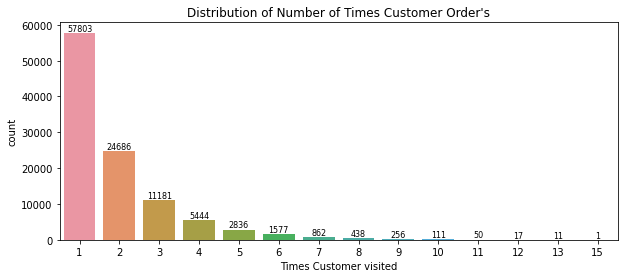

In [23]:
plt.figure(figsize=(10,4))
sns.countplot(x=df.groupby('user_id').order_id.nunique())
plt.xlabel("Times Customer visited")

for i, val in enumerate(df.groupby('user_id').order_id.nunique().value_counts()):
    plt.text(i, val, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':8})

plt.title("Distribution of Number of Times Customer Order's")
plt.show()


In [24]:
# Customers with most no of Orders
print(
    'User_id -> ',
    df.groupby('user_id').order_id.nunique().nlargest(1).index[0],
    ' | No Of Orders -> ',
    df.groupby('user_id').order_id.nunique().nlargest(1).values[0] )

User_id ->  8703  | No Of Orders ->  15


In [25]:
# Customers with most no of items purchased
print(
    'User_id -> ',
    df.groupby('user_id').size().nlargest(1).index[0],
    ' | No Of Items -> ',
    df.groupby('user_id').size().nlargest(1).values[0] )

User_id ->  176478  | No Of Items ->  460


 ***
### 2.3 | Productive Time ( Using order_dow & order_hour_of_day )

* Day 0 has the highest no of records present with almost 19.40% of the total records
* Top 3 busiest days highest to lower order (0, 1, 6)
* 10 is the busiest hour of the Day
* 50 % of the records happen betweem 10 to 16 hours of the day
 ***

In [26]:
# Most Busy Day of the week (Top most busiest Day)
print('Busiest Day -> ',df.groupby(['order_dow']).size().sort_values(ascending=False).reset_index(name='No_of_Orders').iloc[0][0])

# Most Busy Day of the week (Top 3 most busiest Day)
print("\nTop 3 Days ->  ",df['order_dow'].value_counts().nlargest(3).index.to_list())

Busiest Day ->  0

Top 3 Days ->   [0, 1, 6]


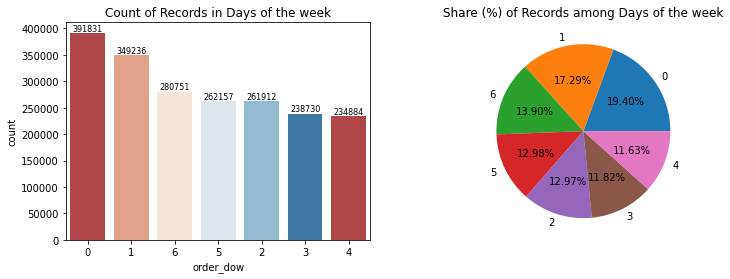

In [27]:
# Records Distribution based on days 

plt.subplots(1,2,figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x=df['order_dow'] ,palette=sns.color_palette("RdBu"),order=df['order_dow'].value_counts().sort_values(ascending=False).index .to_list())
for i, val in enumerate(df['order_dow'].value_counts().sort_values(ascending=False).values):
    plt.text(i, val, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':8})
plt.title("Count of Records in Days of the week")
plt.subplot(1,2,2)
plt.pie(x=df['order_dow'].value_counts(),labels=df["order_dow"].value_counts().index,autopct="%0.2f%%")
plt.title("Share (%) of Records among Days of the week")
plt.show()

In [28]:
# Most Busy hour of the week 

print('Most Busy hour of the week - > ',df.groupby(['order_hour_of_day']).size().sort_values(ascending=False).reset_index(name='No_of_Orders').iloc[0,0])

Most Busy hour of the week - >  10


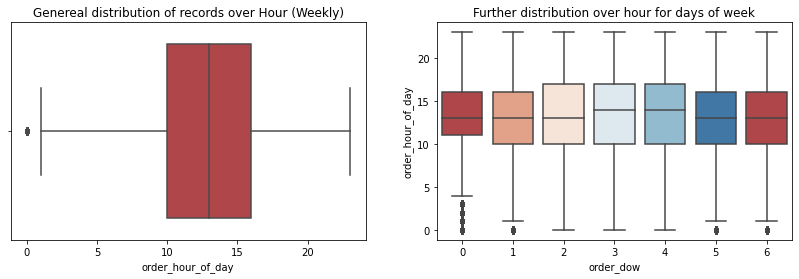

In [29]:
# Records Distribution based on days 

plt.subplots(1,2,figsize=(14,4))
plt.subplot(1,2,1)
sns.boxplot(x=df['order_hour_of_day']  ,palette=sns.color_palette("RdBu"))
plt.title("Genereal distribution of records over Hour (Weekly)")
plt.subplot(1,2,2)
sns.boxplot(x=df['order_dow'],y=df['order_hour_of_day']  ,palette=sns.color_palette("RdBu"))
plt.title("Further distribution over hour for days of week")
plt.show()

 ***
### 2.4 | Frequent Purchase ( Using department & product_name)


* Category Wise

    * Produce has the highest no of records present with almost 29.17% of the total records
    * Top 5 Categories out of 21 total contribute to over 70% records  
    * Top 5 Popular categories - > 'produce', 'dairy eggs', 'snacks', 'beverages', 'frozen'
    * 5 Least Popular Categories -> 'bulk', 'other', 'missing', 'pets', 'alcohol'
 ***
 
* Product Wise
    * fresh fruits has the highest no of records present with almost 11.19% of the total records
    * Top 5 Products out of 134 products contribute to around 35% of records
    * Top 5 Popular Products  - > 'fresh fruits', 'fresh vegetables', 'packaged vegetables fruits', 'yogurt', 'packaged cheese'
    * 5 least popular Products -> 'frozen juice', 'beauty', 'baby accessories', 'baby bath body care', 'kitchen supplies'
    
 ***

In [30]:
print('\nTotal Categories -> ',df['department'].nunique())
print("\nTop 5 departments ->  ",df['department'].value_counts().nlargest(5).index.to_list())
print("\nBottom 5 departments ->  ",df['department'].value_counts().nsmallest(5).index.to_list())


Total Categories ->  21

Top 5 departments ->   ['produce', 'dairy eggs', 'snacks', 'beverages', 'frozen']

Bottom 5 departments ->   ['bulk', 'other', 'missing', 'pets', 'alcohol']


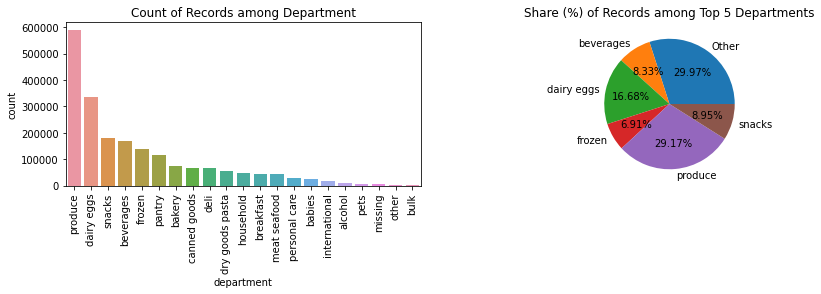

In [31]:
# Records Distribution based on days 

plt.subplots(1,2,figsize=(14,3))

plt.subplot(1,2,1)
sns.countplot(x=df['department'] ,order=df['department'].value_counts().sort_values(ascending=False).index .to_list())
plt.xticks(rotation=90)
plt.title("Count of Records among Department")




plt.subplot(1,2,2)

department=pd.DataFrame({'count' : df.groupby("department").size()}).reset_index()

no_of_top_categories=5
department_cropped=department.copy()
department_cropped.loc[~(department_cropped.department.isin(department_cropped.nlargest(no_of_top_categories,'count')['department'].tolist())),'department']='Other'
department_cropped=department_cropped.groupby("department").sum().reset_index()

plt.pie(x=department_cropped["count"],labels=department_cropped["department"],autopct="%0.2f%%")
plt.title("Share (%) of Records among Top 5 Departments")

plt.show()

In [32]:
print('\nTotal Products -> ',df['product_name'].nunique())
print("\nTop 5 Popular Products ->  ",df['product_name'].value_counts().nlargest(5).index.to_list())
print("\n 5 Least popupar Products ->  ",df['product_name'].value_counts().nsmallest(5).index.to_list())


Total Products ->  134

Top 5 Popular Products ->   ['fresh fruits', 'fresh vegetables', 'packaged vegetables fruits', 'yogurt', 'packaged cheese']

 5 Least popupar Products ->   ['frozen juice', 'beauty', 'baby accessories', 'baby bath body care', 'kitchen supplies']


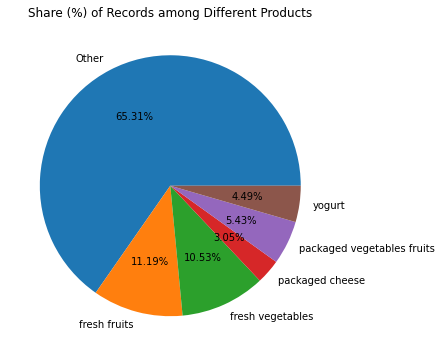

In [33]:
plt.figure(figsize=(8,6))
product_name=pd.DataFrame({'count' : df.groupby("product_name").size()}).reset_index()

no_of_top_categories=5
product_name_cropped=product_name.copy()
product_name_cropped.loc[~(product_name_cropped.product_name.isin(product_name_cropped.nlargest(no_of_top_categories,'count')['product_name'].tolist())),'product_name']='Other'
product_name_cropped=product_name_cropped.groupby("product_name").sum().reset_index()

plt.pie(x=product_name_cropped["count"],labels=product_name_cropped["product_name"],autopct="%0.2f%%")
plt.title("Share (%) of Records among Different Products")



plt.show()

## 3 | Summary

* Over 54% Customer are one time visitor. (Better deals can be made to convert them to frequent customers)
* Top 5 Popular categories - > 'produce', 'dairy eggs', 'snacks', 'beverages', 'frozen'
* 5 Least Popular Categories -> 'bulk', 'other', 'missing', 'pets', 'alcohol'
* Top 5 Popular Products - > 'fresh fruits', 'fresh vegetables', 'packaged vegetables fruits', 'yogurt', 'packaged cheese'
* 5 least popular Products -> 'frozen juice', 'beauty', 'baby accessories', 'baby bath body care', 'kitchen supplies'
* Top 3 busiest days highest to lower order (0, 1, 6) 